In [98]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [99]:
df.shape

(1000, 10)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [101]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [102]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [103]:
df['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [104]:
df['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [105]:
df['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [106]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [107]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [108]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [109]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [110]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [111]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

In [112]:
import numpy as np
df=df.replace(np.NaN,0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [113]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [114]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,0,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,0,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [115]:
#conversion of object into category and then into numeric

for col in df.columns:
    if(df[col].dtype=='object'):
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes

In [116]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,1,1169,6,5
1,22,0,2,1,1,2,5951,48,5
2,49,1,1,1,1,0,2096,12,3
3,45,1,2,0,1,1,7882,42,4
4,53,1,2,0,1,1,4870,24,1


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null int8
Job                 1000 non-null int64
Housing             1000 non-null int8
Saving accounts     1000 non-null int8
Checking account    1000 non-null int8
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null int8
dtypes: int64(4), int8(5)
memory usage: 36.2 KB


In [118]:
#Spliting the dataset into a training set and a testing set

x=df.drop('Checking account',axis=1)
y=df['Checking account']

from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(700, 8)
(700,)
(300, 8)
(300,)


In [120]:
#K – Nearest Neighbour (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier().fit(x_train,y_train)
print('Accuracy of K – Nearest Neighbour Classifier is {:.2f}' .format(model_KNN.score(x_test,y_test)))

Accuracy of K – Nearest Neighbour Classifier is 0.32


In [122]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model_lr=LogisticRegression().fit(x_train,y_train)
print("Accuracy of Logistic Regression is {:.2f}" .format(model_lr.score(x_test,y_test)))

Accuracy of Logistic Regression is 0.40


In [123]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier().fit(x_train,y_train)
print("Accuracy of Random Forest Classifier is {:.2f}" .format(model_rf.score(x_test,y_test)))

Accuracy of Random Forest Classifier is 0.40


In [124]:
#Support Vector Machine (SVM) Classifier

from sklearn.svm import SVC

model_svm=SVC().fit(x_train,y_train)
print("Accuracy of Support Vector Machine Classifier is {:.2f}" .format(model_svm.score(x_test,y_test)))

Accuracy of Support Vector Machine Classifier is 0.40


In [125]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier().fit(x_train,y_train)
print("Accuracy of Decision Tree Classifier is {:.2f}" .format(model_dt.score(x_test,y_test)))

Accuracy of Decision Tree Classifier is 0.38


In [126]:
#Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

model_gnb=GaussianNB().fit(x_train,y_train)
print("Accuracy of Gaussian Naive Bayes Classifier is {:.2f}" .format(model_gnb.score(x_test,y_test)))

Accuracy of Gaussian Naive Bayes Classifier is 0.42


In [127]:
#Gradient Boosting Regressor 

from sklearn.ensemble import GradientBoostingRegressor

model_gbr=GradientBoostingRegressor().fit(x_train,y_train)
print("Accuracy of Gradient Boosting Regressor is {:.2f}" .format(model_gbr.score(x_test,y_test)))

Accuracy of Gradient Boosting Regressor is -0.06


In [128]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

model_ab=AdaBoostClassifier().fit(x_train,y_train)
print("Accuracy of Gradient Boosting Regressor is {:.2f}" .format(model_ab.score(x_test,y_test)))

Accuracy of Gradient Boosting Regressor is 0.42


In [129]:
#Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_lda=LinearDiscriminantAnalysis().fit(x_train,y_train)
print('Accuracy of Linear Discriminant Analysis is {:.2f}' .format(model_lda.score(x_test,y_test)))

Accuracy of Linear Discriminant Analysis is 0.39


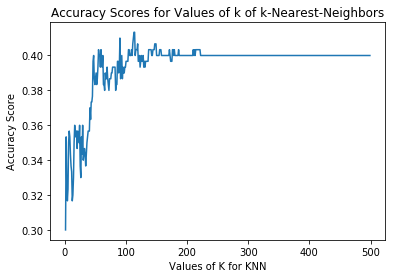

KNN gives Maximum Accuracy is 0.41333333333333333 and least value of K for maximum accuracy is 113


In [130]:
#K – Nearest Neighbour (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier

# experimenting with different k values on which KNN gives more accurate result
score=[]
k_range=range(1,500)
A_max=0
k_best=1

for k in k_range:
    model_knn=KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(x_train,y_train)
    accu_knn=model_knn.score(x_test,y_test)
    score.append(accu_knn)
    if(A_max<accu_knn):
        A_max=accu_knn
        k_best=k
        
plt.plot(k_range,score)
plt.xlabel('Values of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
 
print('KNN gives Maximum Accuracy is {0} and least value of K for maximum accuracy is {1}' .format(A_max,k_best))